# Covid-19 India Data Analysis

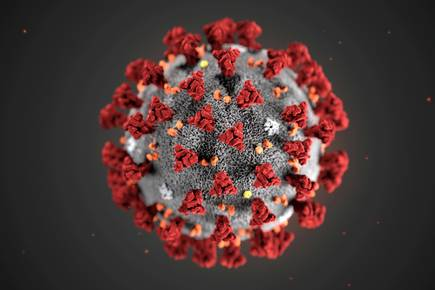


**Context**:

  - January 30 The first case of the COVID-19 in India was reported, originating from China.
  - March 14: Central government declares COVID-19 a 'notified disaster'
  - March 15: The number of positive cases crosses 100
  - March 24: Prime Minister Narendra Modi announces 21-day lockdown
  - March 30: The number of positive cases crosses 1000

**Aim**
    
  - This Project Completely focuses on Data analysis of Covid19 in India.
  - Let's Perform Various Analysis inorder to find the insights behind how rampant covid19 in India.
    

## Please Upvote If you Like this:)
**Suggestions are highly appreciated**

### Importing Necessary Libraries




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from fbprophet import Prophet

### Reading CSV

In [ ]:
df=pd.read_csv("complete.csv",parse_dates=True,index_col='Date')

In [ ]:
df.head()

In [ ]:
nation = pd.read_csv('nation_level_daily.csv')

In [ ]:
nation.head()

In [ ]:

sns.set_style('darkgrid')

In [ ]:
def date(dt):
    l=dt.strip().split()
    if(l[1]=='January'):
        return '2020/01/'+l[0]
    elif(l[1]=='February'):
        return '2020/02/'+l[0]
    elif(l[1]=='March'):
        return '2020/03/'+l[0]
    elif(l[1]=='April'):
        return '2020/04/'+l[0]
    elif(l[1]=='May'):
        return '2020/05/'+l[0]
    elif(l[1]=='June'):
        return '2020/06/'+l[0]
    elif(l[1]=='July'):
        return '2020/07/'+l[0]
        

In [ ]:
nation['Date']=nation['Date'].apply(date)

In [ ]:
nation['Date']=pd.to_datetime(nation['Date'])

In [ ]:
nation.index=nation['Date']

In [ ]:
nation.drop('Date',axis=1,inplace=True)

In [ ]:
nation_test = pd.read_csv('tests_day_wise.csv')

In [ ]:
nation_test['Update Time Stamp']=nation_test['Update Time Stamp'].apply(lambda x:x.split()[0])

In [ ]:
nation_test['Update Time Stamp'] = pd.to_datetime(nation_test['Update Time Stamp'],dayfirst=True)

In [ ]:
nation_test['Month'] = nation_test['Update Time Stamp'].apply(lambda x : x.strftime("%B"))

In [ ]:
nation_test.index=nation_test['Update Time Stamp']


In [ ]:
nation_test.drop(['Update Time Stamp','Tested As Of'],axis=1,inplace=True)

In [ ]:
state_test = pd.read_csv('tests_state_wise.csv')


In [ ]:
state_test['Updated On'] = pd.to_datetime(state_test['Updated On'],dayfirst=True)

In [ ]:
state_test['Month'] = state_test['Updated On'].apply(lambda x : x.strftime("%B"))

In [ ]:
state_test.index = state_test['Updated On']

In [ ]:
state_test.drop('Updated On',axis=1,inplace=True)

In [ ]:
state_level = pd.read_csv('state_level_latest.csv')

In [ ]:
st = state_level.sort_values('Confirmed',ascending=False)[1:11][::-1]['State'].values
con = state_level.sort_values('Confirmed',ascending=False)[1:11][::-1]['Confirmed'].values
de = state_level.sort_values('Confirmed',ascending=False)[1:11][::-1]['Confirmed'].values
re = state_level.sort_values('Recovered',ascending=False)[1:11][::-1]['Confirmed'].values

In [ ]:
district_level = pd.read_csv('district_level_latest.csv')

In [ ]:
district = district_level.sort_values('Confirmed',ascending=False)[1:11]['District'][::-1].values
values = district_level.sort_values('Confirmed',ascending=False)[1:11]['Confirmed'][::-1].values

In [ ]:
top_District = district_level[district_level['Confirmed']!=0].groupby('State').count().sort_values('District',ascending=False)['District'][:10]

## Pan India Analysis

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(14,18))
#Total Confirmed vs Total Recovery
plt.subplot(4,1,1)
nation['Total Confirmed'].plot.area(legend=True)
nation['Total Recovered'].plot.area(legend=True)
plt.title('Total Confirmed vs Total Recovered',fontsize=18);
plt.tight_layout(pad=1.2)
#Daily Confirmed vs Daily Recoveabsry
plt.subplot(4,1,2)
nation['Daily Confirmed'].plot.area(legend=True)
nation['Daily Recovered'].plot.area(legend=True)
plt.title('Daily Confirmed vs Daily Recovey',fontsize=18);
plt.tight_layout(pad=1.2)
#Total Deceased
plt.subplot(4,1,3)
nation['Total Deceased'].plot.area(legend=True,color='black',alpha=0.8)
plt.title('Total Deceased',fontsize=18);
plt.subplot(4,1,4)
nation['Daily Deceased'].plot.area(legend=True,color='gray')
plt.xlabel('Date',fontsize=16)
plt.title('Daily Deceased',fontsize=18);
plt.tight_layout(pad=1.2)

In [ ]:
sizes = [277942,496048,21638,]
labels = ['Active', 'Recovered', 'Deaths']
explode = [0.05,0.05,0.05]
plt.figure(figsize=(12,8))
plt.pie(x=sizes,labels=labels,startangle=9,colors=['#66b3ff','green','red'],autopct="%1.1f%%",explode=explode,shadow=True);
plt.title("Covid-19 India Cases",fontsize=20);
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle);
plt.tight_layout()

In [ ]:
plt.figure(figsize=(14,25))
#Confirmed Cases
plt.subplot(5,1,1)
plt.barh(st,con,color='darkcyan')
plt.tick_params(size=8,labelsize=13)
plt.title('Top 10 States(Confirmed Cases)',fontsize=18)
plt.xlabel('Confirmed Cases',fontsize=16)
#Recovered Cases
plt.subplot(5,1,2)
plt.barh(st,re,color='green',alpha=0.6)
plt.tick_params(size=8,labelsize=13)
plt.title('Top 10 States(Recovered Cases)',fontsize=18);
plt.xlabel('Recovered Cases',fontsize=16)
#Death Cases
plt.subplot(5,1,3)
plt.barh(st,de,color='crimson',alpha=0.8)
plt.tick_params(size=8,labelsize=13)
plt.title('Top 10 States(Death Cases)',fontsize=18);
plt.xlabel('Death Cases',fontsize=16)
plt.tight_layout(pad=3.0)
#Top 10 States with Most Affected Districts
plt.subplot(5,1,4)
plt.barh(top_District[::-1].index,top_District[::-1].values,color='darkcyan',alpha=0.8)
plt.tick_params(size=8,labelsize=13)
plt.title('Top 10 States(With Most Affected Districts)',fontsize=18);
plt.xlabel('Cases',fontsize=16)
plt.tight_layout(pad=3.0)
#Top 10 Districts
plt.subplot(5,1,5)
plt.barh(district,values,color='crimson',alpha=0.8)
plt.tick_params(size=8,labelsize=13)
plt.title('Top 10 Districts(Accounts for 40% Cases)',fontsize=18);
plt.xlabel('Cases',fontsize=16)
plt.tight_layout(pad=3.0)


## Tests Conducted in India

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
sns.barplot('Month','Total Samples Tested',data=nation_test,palette='viridis');
plt.title('Total Samples Tested Per Month',fontsize=18);
plt.subplot(2,1,2)
sns.barplot('Month','Tests per million',data=nation_test,palette='viridis');
plt.title('Tests Per Million',fontsize=18);
plt.tight_layout(pad=2.0)
plt.show()
#nation_test['Total Samples Tested'].plot(kind='area')
#nation_test['Total Positive Cases'].plot(kind='area')


**Let's Explore the Major affected states:**
 - Maharashtra
 - Tamilnadu
 - Delhi
 - Gujarat

## Recovered vs Active vs Deaths

In [ ]:
labels = ['Active','Recovered','Deaths']
explode = [0.05,0.05,0.05]
plt.figure(figsize=(12,14))
#Maharashtra
plt.subplot(2,2,1)
plt.pie(x=[ 93654, 127259,9667],labels=labels,startangle=9,colors=['gold', 'yellowgreen', 'lightcoral'],autopct="%1.1f%%",explode=explode,shadow=True);
plt.title('Maharashtra',fontsize=20);
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);
#Tamil Nadu
plt.subplot(2,2,2)
plt.pie(x=[46655, 78161,1765],labels=labels,startangle=9,colors=['gold', 'yellowgreen', 'lightcoral'],autopct="%1.1f%%",explode=explode,shadow=True);
plt.title('Tamil Nadu',fontsize=20);
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);
#Delhi
plt.subplot(2,2,3)
plt.pie(x=[21567, 82226,3258],labels=labels,startangle=9,colors=['gold', 'yellowgreen', 'lightcoral'],autopct="%1.1f%%",explode=explode,shadow=True);
plt.title('Delhi',fontsize=20);
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);
#Gujarat
plt.subplot(2,2,4)
plt.pie(x=[ 9529, 27742,2009],labels=labels,startangle=9,colors=['gold', 'yellowgreen', 'lightcoral'],autopct="%1.1f%%",explode=explode,shadow=True);
plt.title('Gujarat',fontsize=20);
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);
plt.tight_layout()
plt.show();

## 1.Maharashtra

In [ ]:
plt.figure(figsize=(18,20))
#Total Confirmed Cases
case=df[df['Name of State / UT']=="Maharashtra"]["Total Confirmed cases"]
#Total Cured
cured=df[df['Name of State / UT']=="Maharashtra"]["Cured/Discharged/Migrated"]
#Total Deaths
death=df[df['Name of State / UT']=="Maharashtra"]["Death"]
#New cases per day
new_case=df[df['Name of State / UT']=="Maharashtra"]["New cases"]
#New deaths per day
new_death=df[df['Name of State / UT']=="Maharashtra"]["New deaths"]
#New recovery per day
new_recovery=df[df['Name of State / UT']=="Maharashtra"]["New recovered"]
#Total Confirmed vs Total Cured
plt.subplot(2,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
cured.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
plt.title('Total Confirmed Cases vs Total Discharged',fontsize=18)
#New cases per day vs Recovery per day
plt.subplot(2,2,2)
new_case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
new_recovery.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
plt.title('Daily Cases vs Daily Recovery',fontsize=18)
#Total Deaths
plt.subplot(2,2,3)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red',label='Total Deaths');
plt.title('Total Deaths',fontsize=18)
#New Deaths
plt.subplot(2,2,4)
new_death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.title('Daily Deaths',fontsize=18)
plt.show()

## 2.Tamil Nadu

In [ ]:
plt.figure(figsize=(18,20))
#Total Confirmed Cases
case=df[df['Name of State / UT']=="Tamil Nadu"]["Total Confirmed cases"]
#Total Cured
cured=df[df['Name of State / UT']=="Tamil Nadu"]["Cured/Discharged/Migrated"]
#Total Deaths
death=df[df['Name of State / UT']=="Tamil Nadu"]["Death"]
#New cases per day
new_case=df[df['Name of State / UT']=="Tamil Nadu"]["New cases"]
#New deaths per day
new_death=df[df['Name of State / UT']=="Tamil Nadu"]["New deaths"]
#New recovery per day
new_recovery=df[df['Name of State / UT']=="Tamil Nadu"]["New recovered"]
#Total Confirmed vs Total Cured
plt.subplot(2,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
cured.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
plt.title('Total Confirmed vs Total Cured',fontsize=18)
#New cases per day vs Recovery per day
plt.subplot(2,2,2)
new_case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
new_recovery.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
plt.title('New cases vs Recovery per day',fontsize=18)
#Total Deaths
plt.subplot(2,2,3)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red',label='Total Deaths');
plt.title('Total Deaths',fontsize=18)
#New Deaths
plt.subplot(2,2,4)
new_death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.title('New Deaths Per Day',fontsize=18)
plt.show()

## 3.Delhi

In [ ]:
plt.figure(figsize=(18,20))
#Total Confirmed Cases
case=df[df['Name of State / UT']=="Delhi"]["Total Confirmed cases"]
#Total Cured
cured=df[df['Name of State / UT']=="Delhi"]["Cured/Discharged/Migrated"]
#Total Deaths
death=df[df['Name of State / UT']=="Delhi"]["Death"]
#New cases per day
new_case=df[df['Name of State / UT']=="Delhi"]["New cases"]
#New deaths per day
new_death=df[df['Name of State / UT']=="Delhi"]["New deaths"]
#New recovery per day
new_recovery=df[df['Name of State / UT']=="Delhi"]["New recovered"]
#Total Confirmed vs Total Cured
plt.subplot(2,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
cured.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
plt.title('Total Confirmed vs Total Cured',fontsize=18)
#New cases per day vs Recovery per day
plt.subplot(2,2,2)
new_case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
new_recovery.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
plt.title('New cases vs Recovery per day',fontsize=18)
#Total Deaths
plt.subplot(2,2,3)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red',label='Total Deaths');
plt.title('Total Deaths',fontsize=18)
#New Deaths
plt.subplot(2,2,4)
new_death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.title('New Deaths',fontsize=18)
plt.show()

## 4.Gujarat

In [ ]:
plt.figure(figsize=(18,20))
#Total Confirmed Cases
case=df[df['Name of State / UT']=="Gujarat"]["Total Confirmed cases"]
#Total Cured
cured=df[df['Name of State / UT']=="Gujarat"]["Cured/Discharged/Migrated"]
#Total Deaths
death=df[df['Name of State / UT']=="Gujarat"]["Death"]
#New cases per day
new_case=df[df['Name of State / UT']=="Gujarat"]["New cases"]
#New deaths per day
new_death=df[df['Name of State / UT']=="Gujarat"]["New deaths"]
#New recovery per day
new_recovery=df[df['Name of State / UT']=="Gujarat"]["New recovered"]
#Total Confirmed vs Total Cured
plt.subplot(2,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
cured.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
plt.title('Total Confirmed vs Total Cured',fontsize=18)
#New cases per day vs Recovery per day
plt.subplot(2,2,2)
new_case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
new_recovery.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
plt.title('New cases vs Recovery per day',fontsize=18)
#Total Deaths
plt.subplot(2,2,3)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red',label='Total Deaths');
plt.title('Total Deaths',fontsize=18)
#New Deaths
plt.subplot(2,2,4)
new_death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.title('Daily Deaths',fontsize=18)
plt.show()

## Tests Conducted by the Major Affected States`

In [ ]:
TN = state_test[state_test['State']=='Tamil Nadu']
Delhi = state_test[state_test['State']=='Delhi']
Maharastra = state_test[state_test['State']=='Maharashtra']
Gujarat = state_test[state_test['State']=='Gujarat']

In [ ]:
plt.figure(figsize=(18,18))
#Tests Conducted by Maharastra
plt.subplot(2,2,1)
sns.barplot('Month','Total Tested',data=Maharastra,palette='viridis')
plt.title('Maharashtra',fontsize=18)
#Tests Conducted by TamilNadu
plt.subplot(2,2,2)
sns.barplot('Month','Total Tested',data=TN,palette='viridis')
plt.title('Tamil Nadu',fontsize=18);
#Tests Conducted by Delhi
plt.subplot(2,2,3)
sns.barplot('Month','Total Tested',data=Delhi,palette='viridis')
plt.title('Delhi',fontsize=18)
#Tests Conducted by Gujarat
plt.subplot(2,2,4)
sns.barplot('Month','Total Tested',data=Gujarat,palette='viridis')
plt.title('Gujarat',fontsize=18)
plt.suptitle('Total Tests Conducted',fontsize=25)
plt.show()

In [ ]:
plt.figure(figsize=(18,18))
#Tests Conducted by Maharastra
plt.subplot(2,2,1)
sns.barplot('Month','Tests per million',data=Maharastra,palette='deep')
plt.title('Maharashtra',fontsize=18)
#Tests Conducted by TamilNadu
plt.subplot(2,2,2)
sns.barplot('Month','Tests per million',data=TN,palette='deep')
plt.title('Tamil Nadu',fontsize=18);
#Tests Conducted by Delhi
plt.subplot(2,2,3)
sns.barplot('Month','Tests per million',data=Delhi,palette='deep')
plt.title('Delhi',fontsize=18)
#Tests Conducted by Gujarat
plt.subplot(2,2,4)
sns.barplot('Month','Tests per million',data=Gujarat,palette='deep')
plt.title('Gujarat',fontsize=18)
plt.suptitle('Total Tests Conducted Per Million',fontsize=25)
plt.show()

## Forecasting Using Prophet Model

In [ ]:
forecast_df = pd.read_csv('nation_level_daily.csv')

In [ ]:
forecast_data = forecast_df[['Date','Daily Confirmed']]
forecast_data['Date'] = forecast_data['Date'].apply(date)
forecast_data['Date'] = pd.to_datetime(forecast_data['Date'])
forecast_data.columns = ['ds','y']
#Current Cases
forecast_data.plot(x='ds',y='y',figsize=(12,8),legend=True);
plt.title('Daily Confirmed Cases',fontsize=18);
plt.tight_layout()

In [ ]:
model = Prophet(daily_seasonality=True,seasonality_mode='additive',yearly_seasonality=False)
model.fit(forecast_data)
future = model.make_future_dataframe(periods=12,freq='D')
forecast = model.predict(future)
pred = forecast[['ds','yhat']]

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x='ds',y='yhat',data=pred[:-12],label='Daily Cases')
sns.lineplot(x='ds',y='yhat',data=pred[-12:],label='Predicted Daily Cases')
plt.title('Prophet Predictions(Daily Cases)',fontsize=16);
plt.xlabel('Date',fontsize=14);
plt.ylabel('Cases',fontsize=14);
plt.tight_layout()

## Thank You!! Stay home!! Stay Safe!!